In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
import tensorflow as tf
import pandas as pd
train = pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_test.csv')

In [18]:
print("DataSet Information:")
print("-" * 30)
print('DF Shape: ' ,train.shape)
print('number of Columns: ' ,len(train.columns))
print('number of Observations: ' ,len(train))
print('Number of values in train: ' , train.count().sum())
print('Total Number of Missing values in train: ' , train.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(train.isna().sum().sum()/train.count().sum() *100),'%')
print('Total Number of Duplicated records in train : ' , train.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(train.duplicated().sum().sum()/train.count().sum() *100),'%')

DataSet Information:
------------------------------
DF Shape:  (60000, 785)
number of Columns:  785
number of Observations:  60000
Number of values in train:  47100000
Total Number of Missing values in train:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in train :  43
percentage of Duplicated values :  0.00 %


In [19]:
train = train.drop_duplicates()

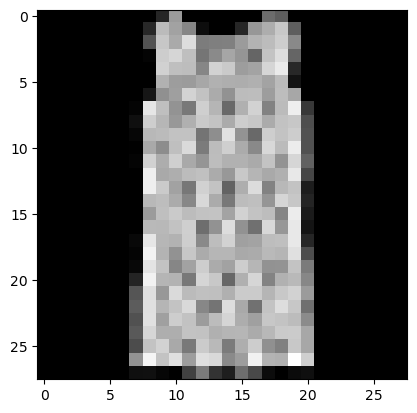

In [20]:
import matplotlib.pyplot as plt
import numpy as np
pixels = train.iloc[18, 1:]  
image = pixels.values.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.show()

In [24]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59957 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.5 MB


In [25]:
train['label'].value_counts().sort_index(ascending = False)

label
9    5998
8    6000
7    5996
6    5989
5    6000
4    5995
3    5997
2    5988
1    5996
0    5998
Name: count, dtype: int64

In [26]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from tensorflow import keras
y = train.pop('label')
y_train = keras.utils.to_categorical(y, 10)

y_test = test.pop('label')
y_test = keras.utils.to_categorical(y_test, 10)

In [28]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#normalize data
X_train = train/255
test = test / 255

In [31]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split

# Assuming 'your_data' is your DataFrame and 'your_labels' is the corresponding label column
X_test, X_val, y_test, y_val = train_test_split(test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Train set: (59957, 784) (59957, 10)
Validation set: (5000, 784) (5000, 10)
Test set: (5000, 784) (5000, 10)


Epoch 1/200
118/118 [==============================] - 1s 9ms/step - loss: 0.6646 - accuracy: 0.7715 - val_loss: 0.7319 - val_accuracy: 0.7894
Epoch 2/200
118/118 [==============================] - 1s 8ms/step - loss: 0.4396 - accuracy: 0.8410 - val_loss: 0.4190 - val_accuracy: 0.8476
Epoch 3/200
118/118 [==============================] - 1s 9ms/step - loss: 0.3948 - accuracy: 0.8573 - val_loss: 0.3565 - val_accuracy: 0.8660
Epoch 4/200
118/118 [==============================] - 1s 9ms/step - loss: 0.3605 - accuracy: 0.8666 - val_loss: 0.3313 - val_accuracy: 0.8768
Epoch 5/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3433 - accuracy: 0.8741 - val_loss: 0.3114 - val_accuracy: 0.8856
Epoch 6/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3267 - accuracy: 0.8789 - val_loss: 0.3031 - val_accuracy: 0.8902
Epoch 7/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3094 - accuracy: 0.8860 - val_loss: 0.2890 - val_accuracy: 0.8952

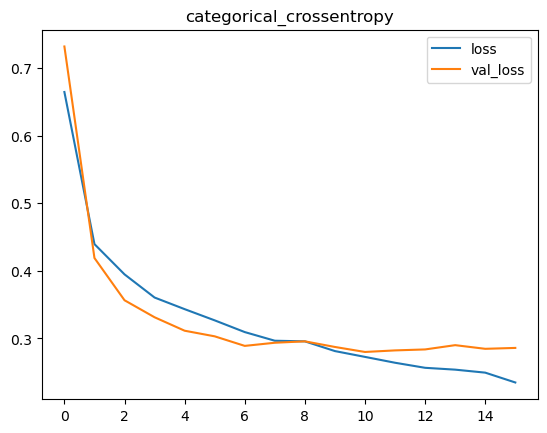

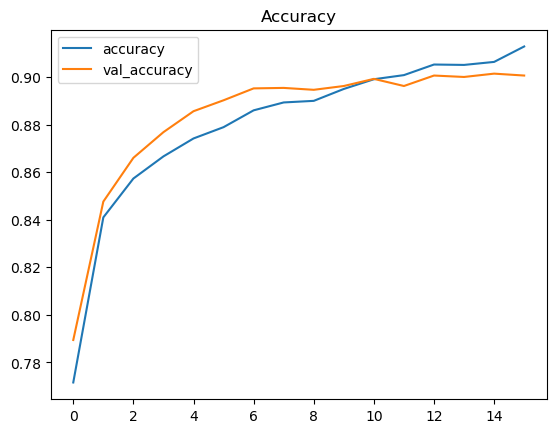

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print('Test Loss and Accuracy : ' ,model.evaluate(X_test , y_test))


In [ ]:
train_labels = train_data['label']
train_data.drop('label', axis=1, inplace=True)
test_labels = test_data['label']
test_data.drop('label', axis=1, inplace=True)
